<a href="https://colab.research.google.com/github/RufinoMartin/Energy-Index-Model/blob/main/Energy_Index_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Presentation

###  Researchers:

**Pedro Vernengo:** Political Scientist and Public Health Policy Planning Analyst.

**Rufino Martín:** Data Analyst and Researcher in Geopolitics and Intelligence.

### Research and Development Theme:

The Industrial Development Organization (UNIDO), belonging to the United Nations (UN), begins a research project, in order to obtain relevant observations on the behavior of the global economy since the beginning of COVID19. In consideration of a potential continuation of the health situation, they decide to analyze the performance of the most important economic indices worldwide, such as the commodity and stock market. In addition to requiring a general diagnosis, UNIDO focuses its research on the behavior of commodity indices, financial assets and the State Response to COVID 19. The data science team is entrusted to carry out said research based on data with international weight. and from a reliable source, requesting, in addition, the preparation of an automatic learning model capable of predicting the price of energy.

### Objectives : 

- Perform descriptive statistics on the entire dataset.
- Obtain univariate analysis of all the Indices.
- Analyze the variation in the price of commodities and stock market indices in relation to government measures by COVID19, within the 2019-2022 time frame.
- Exploration of relationships between the variables and generation of visualizations on the variation of the price of commodities, in order to nurture potential explanations.
- Creation of machine learning model to evaluate and predict asset values.
- Making observations, interpretation and conclusions through the data.



### Repository: 

https://github.com/RufinoMartin/DataScience2021




# The Data and its variables

- ### First Group of Variables: "Government Measures against COVID"

Definition: Health, economic and social executive measures in 168 countries as a result of the Covid19 situation.

Operationalization: Sets of Variables defined and operationalized by the University of Oxford, obtained from the ministries of health of all governments.

Notebook: Restrictions_Covid_Final.ipynb.

Source: University of Oxford.

- ### Second Group of Variables: “Price of Commodities Indices”

Definition: Grouped price of Commodity Indices (Metals, Industry, Agriculture, Food, Energy).

Operationalization: Counting and averaging of historical prices.

Notebook: Indices_Commodities_Final.ipynb

Source: International Monetary Fund.

- ### Third Group of Variables: “Price of Stock Market Indices”

Definition: Prices of the major World Stock Indices

Operationalization: Counting and averaging of historical prices.

Notebook: Indices_Bursatiles_Finales.ipynb.

Source: MarketWatch website.

# Library Import

In [1]:

# Dataframes y Arrays manipulation

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
from functools import reduce

# Visualizations

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px

# matplotlib Config

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Lineal Regresion Library

# Pre-proc and Modeling

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Testing and optimization

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# warning config

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Due to the large number and size of the datasets, a previous digestion of them has been carried out. To access the preliminary notebooks where this work was carried out, consult the repository notebooks.
 
The result of the preliminary processing has been a .CSV file, which we proceed to import, and if pd.read is not executed correctly, it is available here:
 
https://github.com/RufinoMartin/DataScience2021/blob/main/DatasetFinal.csv
 
Copy RAW URL and paste below:
 

In [3]:
df_Dataset = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/Energy-Index-Model/main/DatasetFinal.csv')

# Data Wrangling

Run all cells below for a correct dataframe usage. 

We proceed to correct the data types of CountryName and DateTime.

In [4]:
# See the data types in our dataset.

df_Dataset.dtypes

Unnamed: 0                          int64
Pais                               object
Fecha                              object
Ind. Rigor C19                    float64
Ind. Sanitario C19                float64
Ind. Apoyo Economico C19          float64
Promedio Respuesta Estatal C19    float64
Alimentos                         float64
Industrial                        float64
Agro                              float64
Metales                           float64
Energia                           float64
Promedio Commodities              float64
Dolar Americano                   float64
$S&P500                           float64
$SHA                              float64
$UKX                              float64
$SX5P                             float64
Promedio Bursatil                 float64
dtype: object

In [5]:
# Remove of residual column

df_Dataset.drop(columns={'Unnamed: 0'}, inplace=True)

In [6]:
# 'Fecha' to  DateTime type

df_Dataset['Date'] = pd.to_datetime(df_Dataset['Fecha'])

In [7]:
# 'Pais' to  String format

df_Dataset['Country'] = df_Dataset['Pais'].astype(str)

In [8]:
# Check

df_Dataset.dtypes

Pais                                      object
Fecha                                     object
Ind. Rigor C19                           float64
Ind. Sanitario C19                       float64
Ind. Apoyo Economico C19                 float64
Promedio Respuesta Estatal C19           float64
Alimentos                                float64
Industrial                               float64
Agro                                     float64
Metales                                  float64
Energia                                  float64
Promedio Commodities                     float64
Dolar Americano                          float64
$S&P500                                  float64
$SHA                                     float64
$UKX                                     float64
$SX5P                                    float64
Promedio Bursatil                        float64
Date                              datetime64[ns]
Country                                   object
dtype: object

In [9]:
df_Dataset.rename(columns={'Ind. Rigor C19':'C19 Stringency Index', 'Ind. Sanitario C19':'C19 Sanitary Index', 'Ind. Apoyo Economico C19':'C19 Economic Index','Promedio Respuesta Estatal C19':'C19 AVG State Response',
                             'Alimentos':'Food','Metales':'Metals','Energia':'Energy','Promedio Commodities':'AVG Commodities',
                             'Dolar Americano':'USD Index','Promedio Bursatil':'AVG Stocks'}, inplace=True)

In [10]:
# Column Reorder

df_Dataset = df_Dataset[['Date', 'Country', 'C19 Stringency Index', 'C19 Sanitary Index', 'C19 Economic Index','C19 AVG State Response',
                             'Food','Industrial','Agro','Metals','Energy', 'AVG Commodities',
                             'USD Index','$S&P500','$SHA','$UKX','$SX5P','AVG Stocks']]

In [11]:
df_Dataset.head(5)

,Date,Country,C19 Stringency Index,C19 Sanitary Index,C19 Economic Index,C19 AVG State Response,Food,Industrial,Agro,Metals,Energy,AVG Commodities,USD Index,$S&P500,$SHA,$UKX,$SX5P,AVG Stocks
0,2019-01-01,0,0.0,0.0,0.0,0.0,100.466542,118.836909,103.536150,114.711385,133.302098,117.078244,95.58,2704.10,2584.57,6968.85,2897.13,3788.6625
1,2019-02-01,0,0.0,0.0,0.0,0.0,98.772205,125.808562,103.608780,120.811052,136.048817,119.011525,96.16,2709.80,2940.95,7074.73,3029.67,3938.7875
2,2019-03-01,0,0.0,0.0,0.0,0.0,98.063110,127.539176,105.409046,121.105733,138.256367,119.910036,97.28,2834.40,3090.76,7279.19,3117.01,4080.3400
3,2019-04-01,0,0.0,0.0,0.0,0.0,101.569201,129.656529,104.681017,121.924057,143.768294,123.416731,97.48,2945.83,3078.34,7418.22,3199.51,4160.4750
4,2019-05-01,0,0.0,0.0,0.0,0.0,98.094289,129.330578,105.436360,121.161561,139.410557,120.477541,97.61,2752.06,2898.70,7161.71,3042.89,3963.8400


In [12]:
# Decimal Roundup

df_Dataset = round(df_Dataset, 2)

In [13]:
# We drop all the rows in which the date goes beyond January 2022, since that is the extent of our Commodities source updated by the IMF. 

df_Dataset.drop(df_Dataset.loc[df_Dataset['Date'] > '2022-01-01 01:00:00'].index, inplace=True)


In [14]:
df_Dataset.shape

(7812, 18)

In [15]:
df_Dataset.head(1)

,Date,Country,C19 Stringency Index,C19 Sanitary Index,C19 Economic Index,C19 AVG State Response,Food,Industrial,Agro,Metals,Energy,AVG Commodities,USD Index,$S&P500,$SHA,$UKX,$SX5P,AVG Stocks
0,2019-01-01,0,0.0,0.0,0.0,0.0,100.47,118.84,103.54,114.71,133.3,117.08,95.58,2704.1,2584.57,6968.85,2897.13,3788.66


### **Data Dictionary**

Our Dataframe is made up of Indices, that is, all the variables are already binders of other variables. The C19 Government Indices, for example, are made up of multiple isolated variables. The Stock Market Indices represent stock exchanges of tens or hundreds of companies. The Commodities Indices include the world prices of hundreds or thousands of products in each sector.


- ***Government C-19:***

"C19 Rigor Index" (Confinements, Restrictions, Prohibitions)

"C19 Health Index" (Protocol Modifications, Testing Regime, Investment in Health, Health Passport)

"Economic Support Index C19" (Economic subsidies, executive economic plans)

***Superscript:*** "Average State Response C19" (Summary of all indicators)


- ***Stock:***

"USD Index" (DYX or The U.S. Dollar Index is used to measure the value of the dollar against a basket of six world currencies: Euro, Swiss Franc, Japanese Yen, Canadian dollar, British pound, and Swedish Krona)

"S&P500" ("Standard and Poor 500" is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States)

"SHA" (The Shanghai Stock Exchange is one of the three stock exchanges operating independently in mainland China. The Shanghai Stock Exchange is the world's 3rd largest stock market by market capitalization at US$7.62 trillion as of July 2021)

"UKX" (The "FTSE 100 Index" The Financial Times Stock Exchange 100 Index, is a share index of the 100 companies listed on the London Stock Exchange with the highest market capitalisation.

"SX5P" (The STOXX Europe 50 index provides a blue-chip representation of supersector leaders in Europe covering almost 50% of the free-float market capitalization of the European stock market.)

***Superindex:***: "Market Average" (Averages the 4 superior Indices, with the exception of the dollar)

- ***Commodities (IMF):***
 
 
 "Food", "Industrial", "Agro", "Metals" and "Energy".

 ***Superindex:***: "Average Commodities" (Average the top 5 Indices)


# Exploratory Data Analysis (EDA) 

## Descriptive Statistic Exploration

In [16]:
def EDA(df_Dataset):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df_Dataset.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columns :' + '\033[0m')
    print(df_Dataset.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Data Types and Missing Values:' + '\033[0m')
    print(df_Dataset.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df_Dataset.columns:
        print('\033[1m' + 'Unique Values in {} :'.format(col) + '\033[0m',len(df_Dataset[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summarized Statistics :' + '\033[0m')
    print(df_Dataset.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Number of Duplicated values :' + '\033[0m')
    print(df_Dataset.duplicated().sum())
          
EDA(df_Dataset)

EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(7812, 18) 
------------------------------------------------------------------------------------

Columns :
Index(['Date', 'Country', 'C19 Stringency Index', 'C19 Sanitary Index', 'C19 Economic Index', 'C19 AVG State Response', 'Food', 'Industrial', 'Agro', 'Metals', 'Energy', 'AVG Commodities', 'USD Index', '$S&P500', '$SHA', '$UKX', '$SX5P', 'AVG Stocks'], dtype='object') 
------------------------------------------------------------------------------------

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7812 entries, 0 to 7811
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    7812 non-null   datetime64[ns]
 1   Country                 7812 non-null   object        
 2   C19 Stringency Index    7812 non-null   float64       
 3   C19 Sanitary Index      7812 non-null   f

In [17]:
CorrelacionP = df_Dataset.corr(method="pearson")
CorrelacionP

,C19 Stringency Index,C19 Sanitary Index,C19 Economic Index,C19 AVG State Response,Food,Industrial,Agro,Metals,Energy,AVG Commodities,USD Index,$S&P500,$SHA,$UKX,$SX5P,AVG Stocks
C19 Stringency Index,1.000000,0.936312,0.464501,0.926592,-0.090910,0.025001,-0.112806,0.102006,-0.204999,-0.153127,-0.189712,-0.008440,0.079240,-0.305363,-0.208251,-0.138677
C19 Sanitary Index,0.936312,1.000000,0.485740,0.988490,0.135320,0.241197,0.100331,0.314526,0.010058,0.073824,-0.310678,0.219534,0.284972,-0.144144,-0.012622,0.074592
C19 Economic Index,0.464501,0.485740,1.000000,0.609879,-0.071588,0.024762,-0.079511,0.091044,-0.142647,-0.105785,-0.195629,0.003441,0.096179,-0.222582,-0.153258,-0.091583
C19 AVG State Response,0.926592,0.988490,0.609879,1.000000,0.104569,0.218032,0.073326,0.295635,-0.021490,0.042497,-0.312833,0.192315,0.268517,-0.171762,-0.042810,0.046154
Food,-0.090910,0.135320,-0.071588,0.104569,1.000000,0.919030,0.922989,0.862100,0.899978,0.953727,-0.396772,0.946241,0.778810,0.813178,0.902462,0.941494
Industrial,0.025001,0.241197,0.024762,0.218032,0.919030,1.000000,0.913126,0.983133,0.725112,0.824731,-0.655258,0.876470,0.833134,0.659352,0.751620,0.840568
Agro,-0.112806,0.100331,-0.079511,0.073326,0.922989,0.913126,1.000000,0.867335,0.787299,0.857831,-0.540963,0.855477,0.807218,0.722265,0.775602,0.855411
Metals,0.102006,0.314526,0.091044,0.295635,0.862100,0.983133,0.867335,1.000000,0.658829,0.768378,-0.740376,0.851855,0.864520,0.551823,0.666395,0.781912
Energy,-0.204999,0.010058,-0.142647,-0.021490,0.899978,0.725112,0.787299,0.658829,1.000000,0.986789,-0.177270,0.914971,0.699628,0.834571,0.928093,0.929611
AVG Commodities,-0.153127,0.073824,-0.105785,0.042497,0.953727,0.824731,0.857831,0.768378,0.986789,1.000000,-0.294651,0.956323,0.768754,0.830156,0.932363,0.955467


## Visual Exploration

### Multivariate Analysis for Government Indices C-19

In [ ]:
# In case of visuals errors >

%matplotlib inline
plt.close('all')

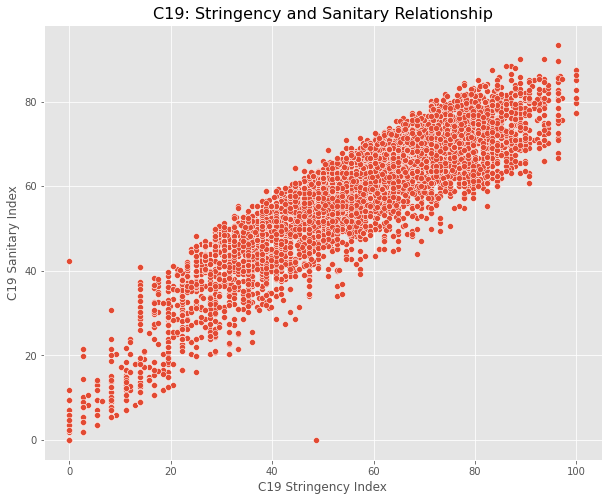

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='C19 Stringency Index',y='C19 Sanitary Index',data=df_Dataset)
plt.title('C19: Stringency and Sanitary Relationship', fontsize=16)
plt.show()

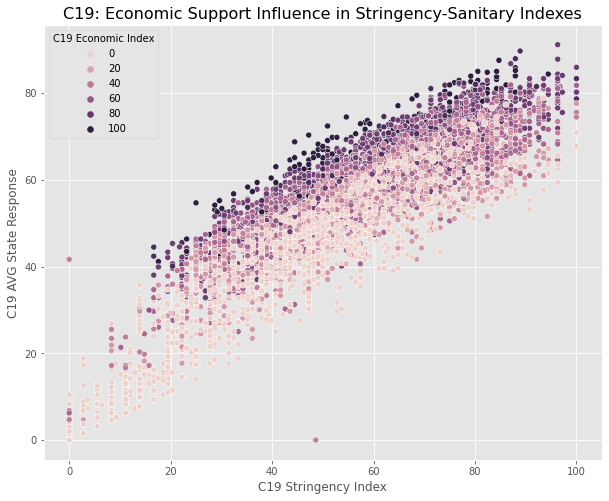

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='C19 Stringency Index',y='C19 AVG State Response',data=df_Dataset,hue='C19 Economic Index')
plt.title('C19: Economic Support Influence in Stringency-Sanitary Indexes', fontsize=16)
plt.show()



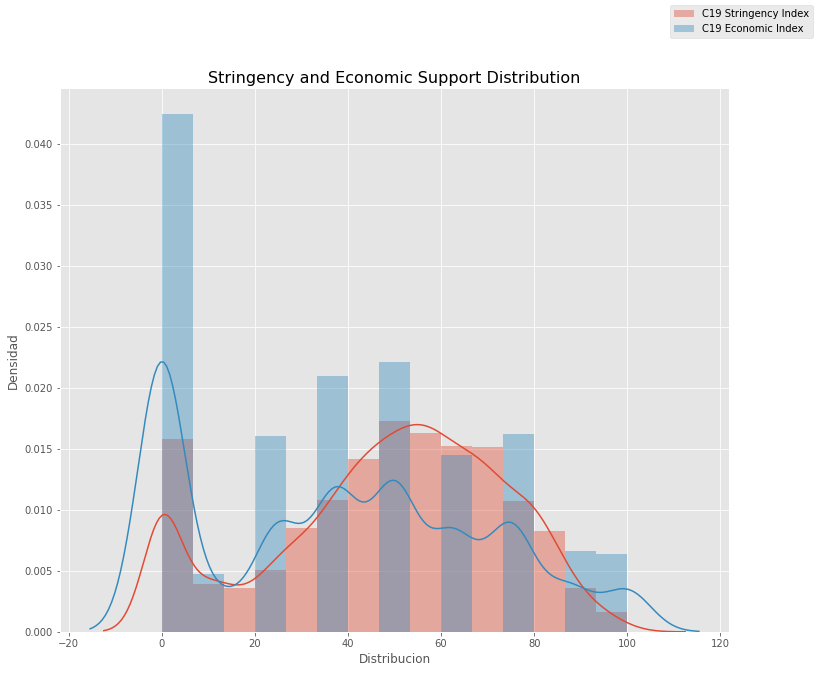

In [21]:
# Shared graph for the distributions of the Stringency Index and Economic Support Index. 

fig = plt.figure(figsize=(12,10))

sns.distplot(df_Dataset['C19 Stringency Index'], kde=True, hist=True, bins=15, label='C19 Stringency Index')
sns.distplot(df_Dataset['C19 Economic Index'], kde=True, hist=True, bins=15, label='C19 Economic Index')

fig.legend()
plt.xlabel('Distribucion', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.title('Stringency and Economic Support Distribution', fontsize=16)

plt.show()

**Observations**

  The visualizations reinforce what Pearson's correlation shows: The indexes of government measures for Covid19 are closely related to each other. This makes sense:

1) because they share some of the indicators of which they are made up.

2) because the indices reflect executive policies, which generally increased or decreased jointly and in response to the increase in cases/infections.

The influence of economic support can also be seen in the increased rigor and government response.

### Univariate Analysis for Commodity Indexes
 

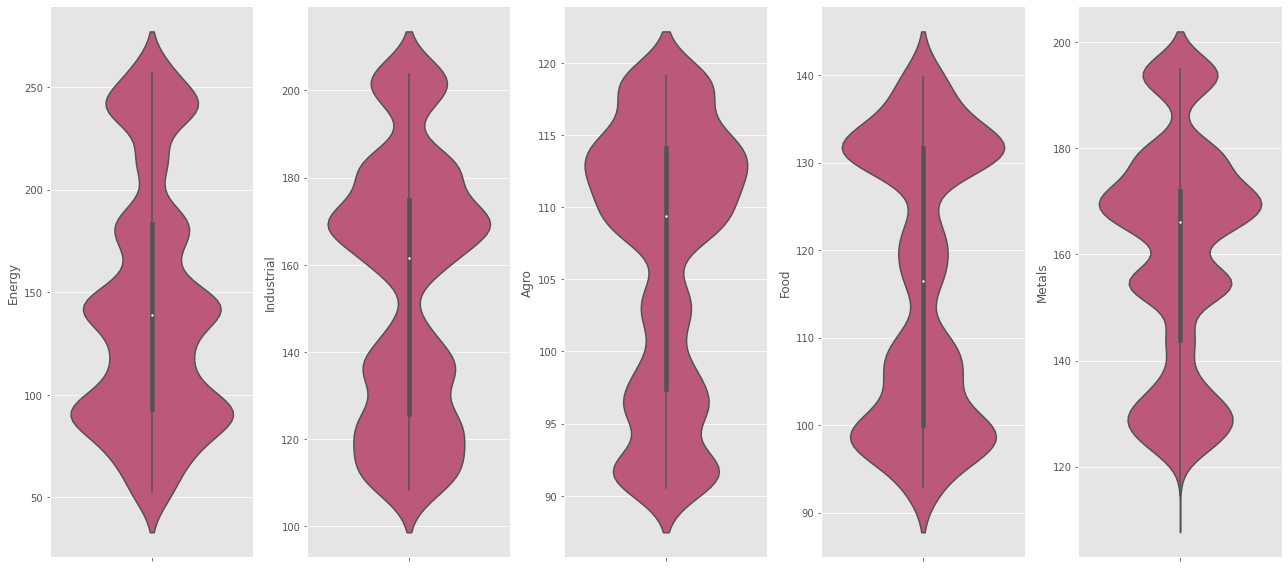

In [22]:
variables1 = ['Energy', 'Industrial', 
             'Agro','Food','Metals']

fig, axes = plt.subplots(1, len(variables1), figsize=(18,8))
for ax, variable1 in zip(axes, variables1):
    ax = sns.violinplot( y=variable1, data=df_Dataset, ax=ax, palette='plasma')
plt.tight_layout()

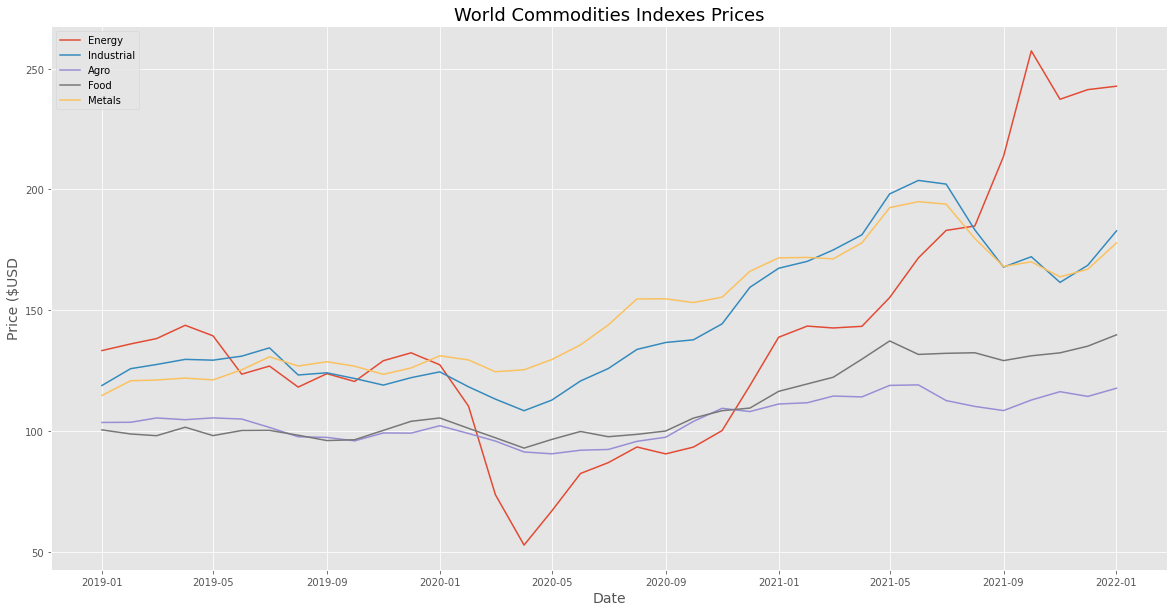

In [24]:
# Commodities Indexes

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_Dataset.Date, df_Dataset['Energy'], label='Energy')
ax.plot(df_Dataset.Date, df_Dataset['Industrial'], label='Industrial')
ax.plot(df_Dataset.Date, df_Dataset['Agro'], label='Agro')
ax.plot(df_Dataset.Date, df_Dataset['Food'],label='Food')
ax.plot(df_Dataset.Date, df_Dataset['Metals'],label='Metals')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Price ($USD', fontsize=14)

plt.legend()
plt.title('World Commodities Indexes Prices', fontsize=18)
plt.show()

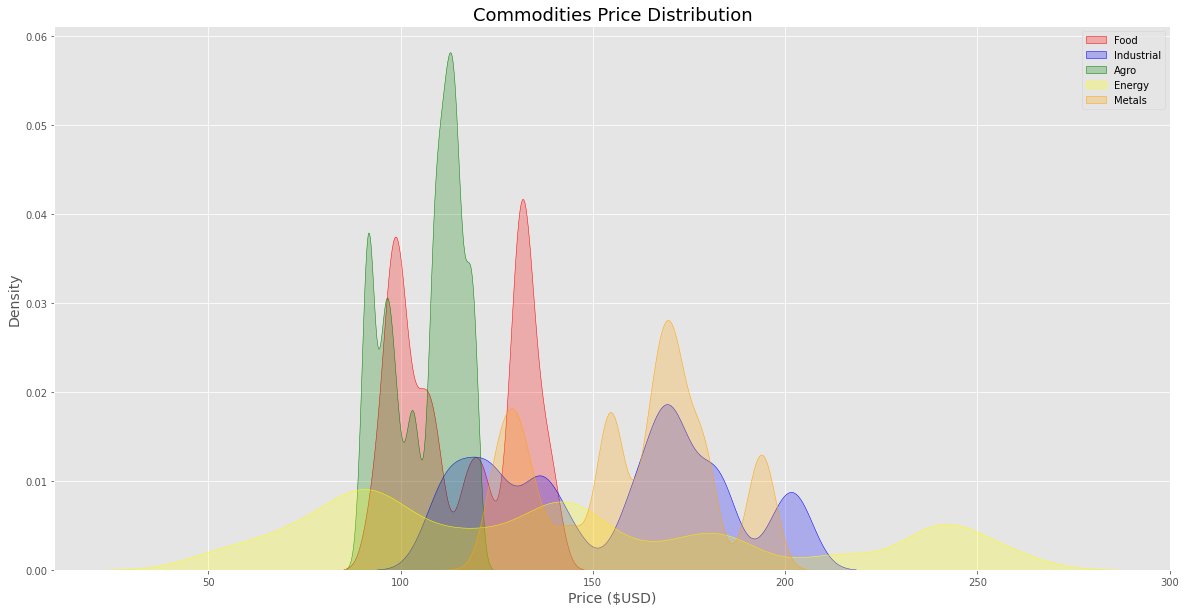

In [25]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df_Dataset.Food, label='Food', shade=True, color='red', )
sns.kdeplot(df_Dataset.Industrial, label='Industrial', shade=True, color='blue')
sns.kdeplot(df_Dataset.Agro, label='Agro', shade=True, color='green')
sns.kdeplot(df_Dataset.Energy, label='Energy', shade=True, color='yellow')
sns.kdeplot(df_Dataset.Metals, label='Metals', shade=True, color='orange')

plt.legend()
plt.title('Commodities Price Distribution', fontsize=18)
plt.xlabel('Price ($USD)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

**Observations**

Although all the commodity indices register a similar megatrend for the period studied (up), they also exhibit a different behavior among themselves:

- The Industrial Index and the Metals Index have a great relationship.
- The Food Index and the Agro Index have a great relationship.
- The Energy Index stands out for its own or zigzagging behavior, registering the maximum low and the maximum high among the indices, that is, it is the most volatile.

For these reasons, although a variable that brings together these Indices ("Average Commodities") will be used, these indices will also continue to be analyzed individually.

### Univariate Analysis for Stock Indexes

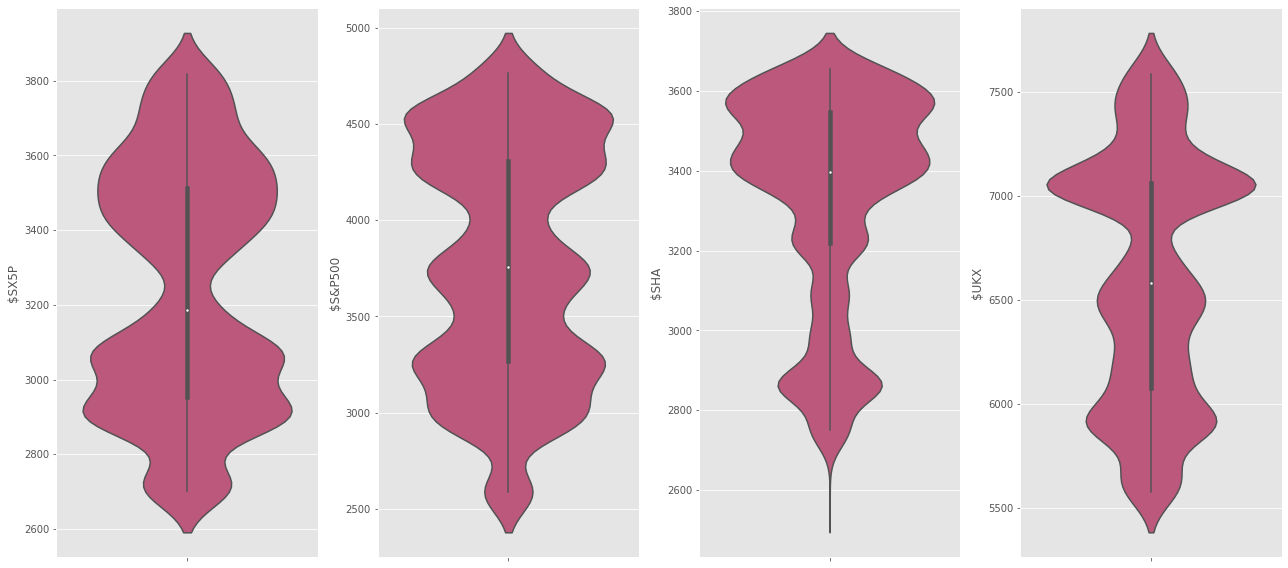

In [26]:
variables = ['$SX5P', '$S&P500', 
             '$SHA','$UKX']

fig, axes = plt.subplots(1, len(variables), figsize=(18,8))
for ax, variable in zip(axes, variables):
    ax = sns.violinplot( y=variable, data=df_Dataset, ax=ax, palette='plasma')
plt.tight_layout()

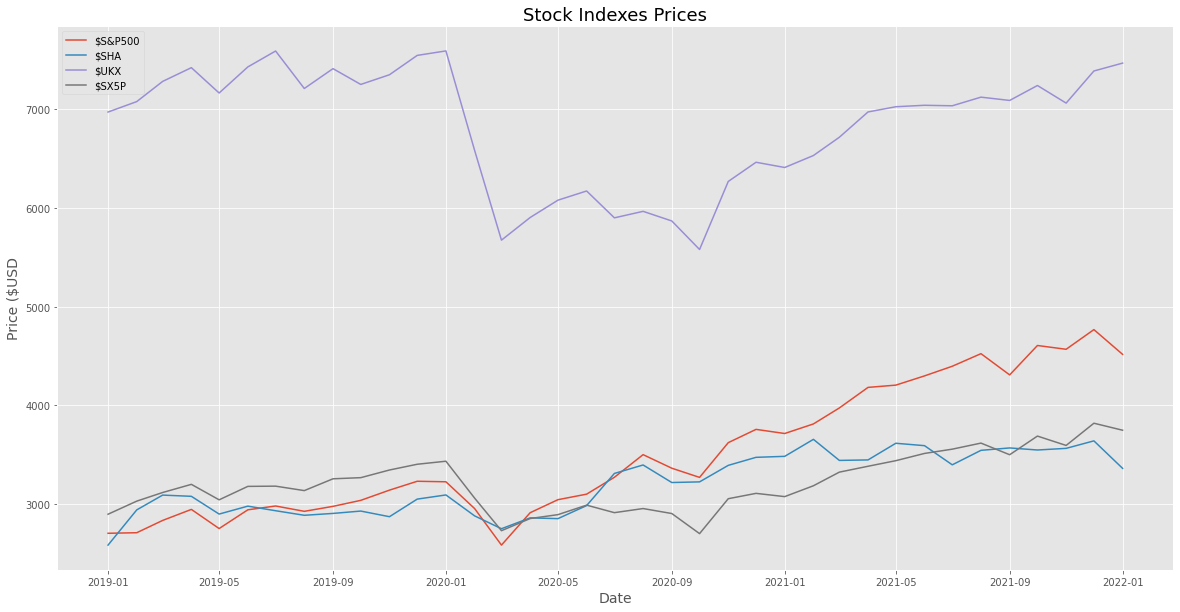

In [27]:
# Stock Indexes

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_Dataset.Date, df_Dataset['$S&P500'],label='$S&P500')
ax.plot(df_Dataset.Date, df_Dataset['$SHA'],label='$SHA')
ax.plot(df_Dataset.Date, df_Dataset['$UKX'],label='$UKX')
ax.plot(df_Dataset.Date, df_Dataset['$SX5P'],label='$SX5P')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Price ($USD', fontsize=14)
plt.legend()
plt.title('Stock Indexes Prices', fontsize=18)
plt.show()

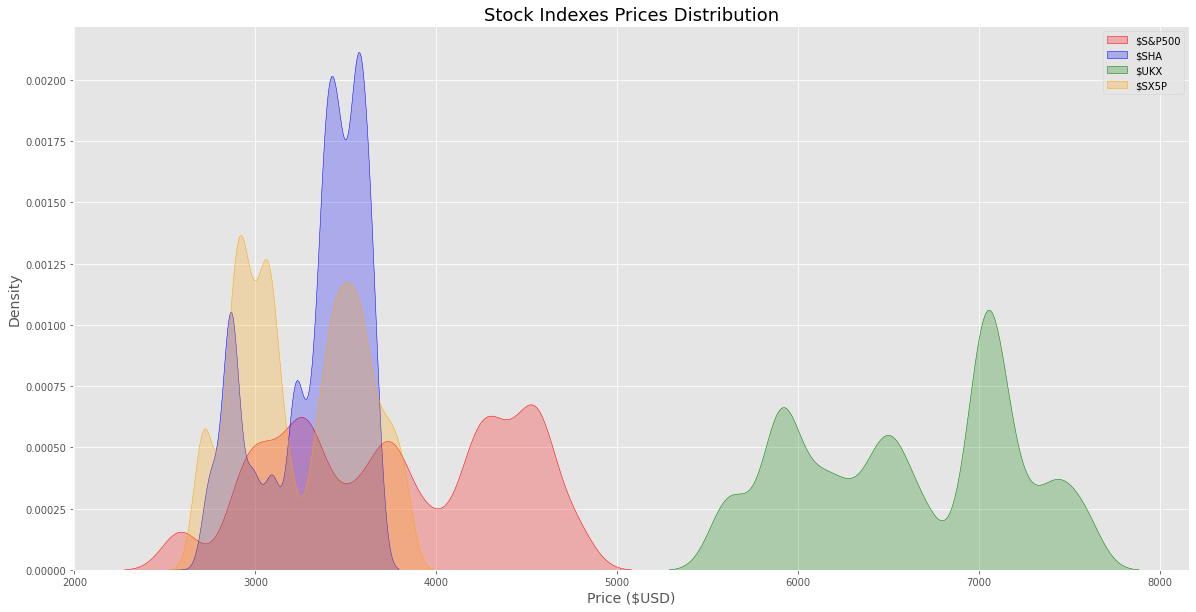

In [28]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df_Dataset['$S&P500'], label='$S&P500', shade=True, color='red')
sns.kdeplot(df_Dataset['$SHA'], label='$SHA', shade=True, color='blue')
sns.kdeplot(df_Dataset['$UKX'], label='$UKX', shade=True, color='green')
sns.kdeplot(df_Dataset['$SX5P'], label='$SX5P', shade=True, color='orange')

plt.legend()
plt.title('Stock Indexes Prices Distribution', fontsize=18)
plt.xlabel('Price ($USD)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

**Observations**

A common pattern can be verified for the 4 Stock Market Indices, even belonging to different regions. This fulfills the requirement of using them, in a unified way, as a representative financial variable at a global level. From here on, the analysis will use an average that we have made of these indices, called "Stock Market Average". 

### Multivariate Timeless Analysis For All Variables

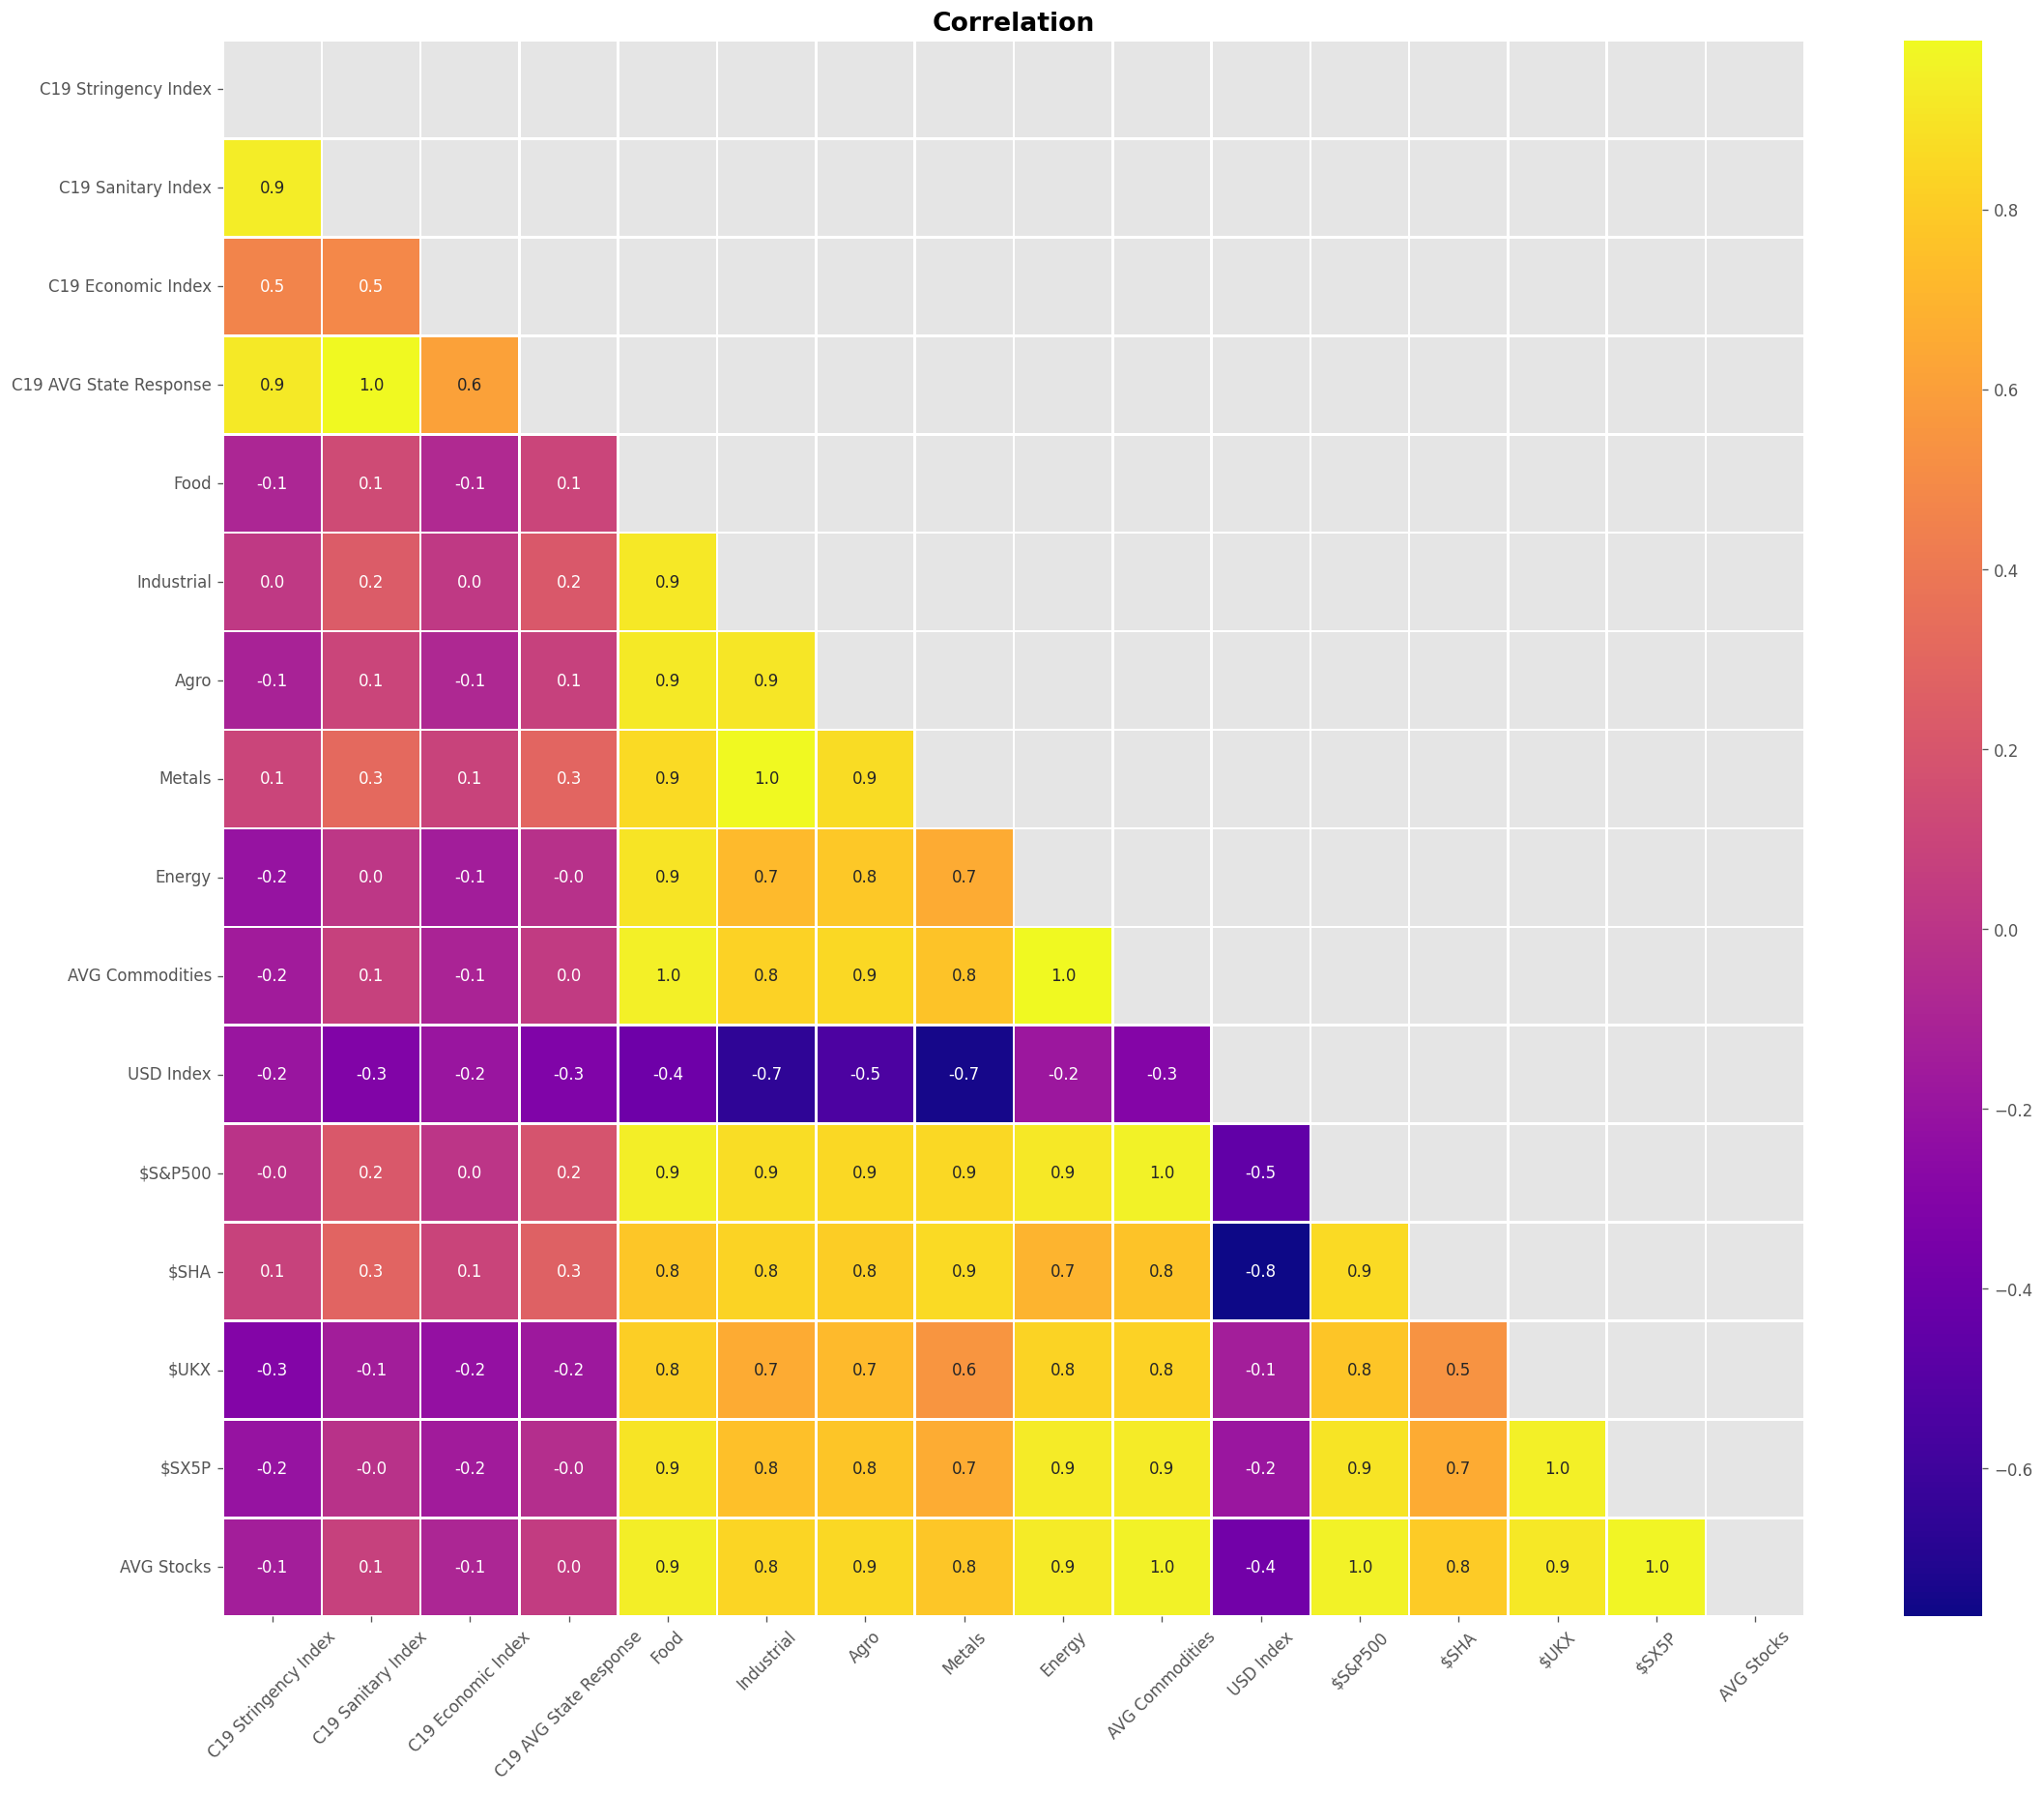

In [30]:

plt.figure(dpi = 120,figsize= (22,18))
mask = np.triu(np.ones_like(df_Dataset.corr(),dtype = bool))
sns.heatmap(df_Dataset.corr(),mask = mask, fmt = ".1f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.title('Correlation', fontsize=16, fontweight='bold')
plt.show()

**Observations**

After studying the correlations, it is possible to say that the correlation between Stock and Commodity Indices is positive, and that potentially this will be the field on which we will then seek to introduce the Time variable to produce and test a hypothesis.
We then add, on top of these two superindices, the relationship with a third party: the Government measures for C19.

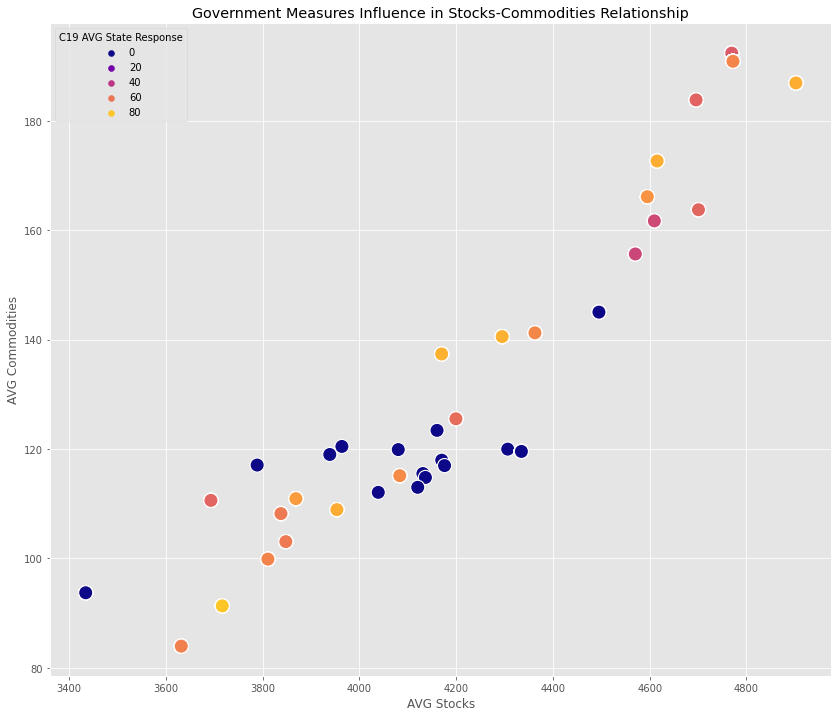

In [32]:
# Relationship between the 3 Superscripts.
# Here we have the candidates for working hypotheses and therefore targets: the three superdinces or agglutinating variables.

plt.figure(figsize=(14,12))
sns.scatterplot(x='AVG Stocks',y='AVG Commodities',data=df_Dataset,hue='C19 AVG State Response', s=200, palette='plasma')
plt.title('Government Measures Influence in Stocks-Commodities Relationship')
plt.show()

Having corroborated a positive correlation between the superscripts, we proceed to investigate the commodities individually against the same superscripts.

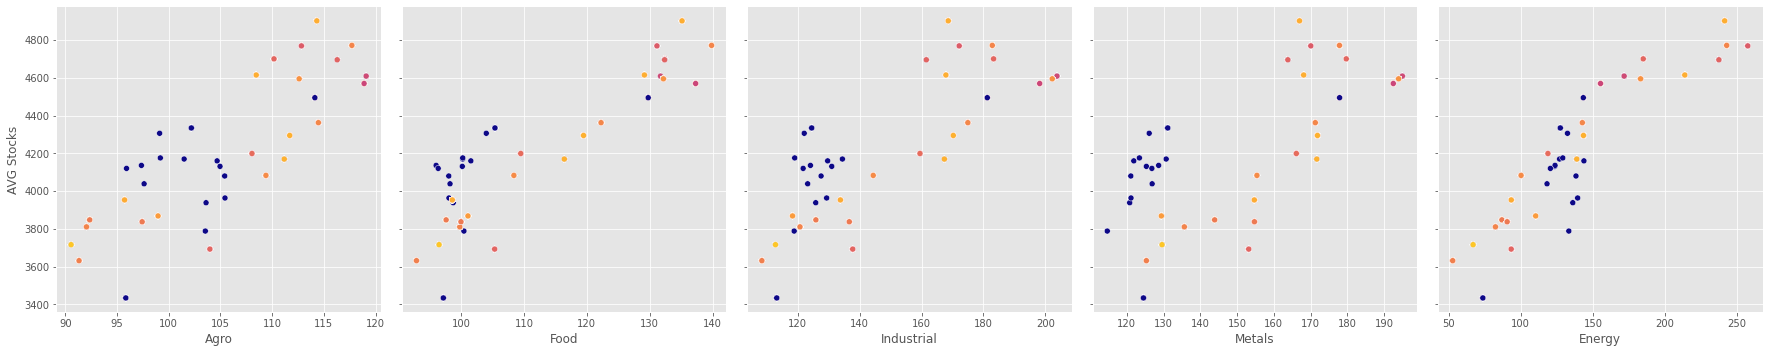

In [33]:
g = sns.PairGrid(df_Dataset, x_vars=['Agro','Food','Industrial','Metals','Energy'], y_vars='AVG Stocks', hue='C19 AVG State Response', height=5, palette='plasma')
g.map(sns.scatterplot)


## Target Variable Definition

The energy index is outlined as our Target variable, Dependent, to explain. We produced a few visualizations to get a closer look 

In [34]:
px.box(df_Dataset, x="Energy", )

In [35]:
# Dive deeper in energy index

fig = px.scatter(df_Dataset, x='AVG Stocks', y='AVG Commodities',
	         size='Energy', log_x=True, hover_name='Energy', color='C19 AVG State Response', size_max=60, title="Energy Index Price")


fig.show()

# Machine Learning Model Implementation

The purpose will be to develop a model that can predict the price of the ***Energy Index*** in relation to the rest of the variables that have been analyzed so far.

**Target dependent variable**: Energy Index, [***'Energy'***]

**Independent variables:** Superscripts such as ***Stock Market Average, Commodities Average and State General Response C19.***

**Purpose of the Model:** Price Prediction

**Models Used:** Simple Linear Regression (SLR) and Multivariate (MLR)

The price of energy has been the variable that has had the most curious and volatile behavior within the commodities in the last two years. It registers historical maximums, like most of the variables, but it has relative autonomy with respect to these variables, as far as price is concerned. It is known that the price of energy is usually manipulated by governments through subsidies, but at the same time, it receives all the influences of other world indices. This makes it a hybrid variable as far as public-private and national-international are concerned, and for this reason we are interested in its possible future behavior.

We then begin experimenting to eventually apply these techniques to our goals.

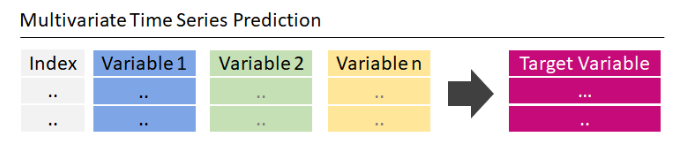

# PCA : Principal Component Analysis.

By now, we know what our

- **Feature Variables** (characteristic or independent) = "Stock Market Average", "Commodities Average", "State Response Average C19".
- **Target Variable** (dependent, to be predicted) = "Energy".

We also know that although they are few dimensions, the dataframe is still considerable with its almost 8000 rows.

For this reason, before starting, we carry out a PCA (principal component analysis), in order to
- Obtain a first focused visualization of the data.
- Have a dataframe with reduced dimensionality available, if needed.

The PCA is a statistical method that allows simplifying the complexity of sample spaces with many dimensions while preserving their information.

In [36]:
# We graph First, the degree of explanation of the variance that the PCA can offer, that is, how many principal components (PCs) help to explain the % of variance.


df = pd.DataFrame(df_Dataset, columns=['C19 Stringency Index', 'C19 Sanitary Index', 'C19 Economic Index','C19 AVG State Response',
                             'Food','Industrial','Agro','Metals','Energy','AVG Commodities',
                             'USD Index','$S&P500','$SHA','$UKX','$SX5P','AVG Stocks'])

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

With only 2 main components, almost 100% of the variance is explained. This is because, although the variables are many, they are actually very similar to each other. Hence our decision to collect them in superscripts, with which we try next:

In [37]:

df = pd.DataFrame(df_Dataset, columns=['C19 AVG State Response','Energy','AVG Commodities',
                             'AVG Stocks'])

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Confirming that the variance between the characteristics is explained from few components.
Why? Because the variance of these data is not explained by their variables per se, but because their relationship to the TIME variable.
To visualize this, we tried plotting 3 main components in 3D. : 

In [38]:

X = df_Dataset[['C19 Stringency Index', 'C19 Sanitary Index', 'C19 Economic Index','C19 AVG State Response',
                             'Food','Industrial','Agro','Metals','Energy','AVG Commodities',
                             'USD Index','$S&P500','$SHA','$UKX','$SX5P','AVG Stocks']]

pca = PCA(n_components=3)                         # Reduce to 3 Components
components = pca.fit_transform(X)                 # Reduction and standarization

total_var = pca.explained_variance_ratio_.sum() * 100        # which % of variance is explained?

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_Dataset['Energy'],
    title=f'Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

The three component PCA explains the variance of the data quite clearly. Three more or less marked groups can be observed.

- In the lowest scores of PC1 and PC2, the maximum values of Energy.
- For the highest PC1 scores, the minimum Energy values.
- For the highest PC3 scores, a grouping of mean Energy values.

Tentatively, this is explained as follows: these 3 main components represent our 3 superindices: (Equity Average, Commodities Average and C19 State Response Average). Hence, identifiable groupings are formed.

Save the function **components** for our 3-PCA in case we need it. At the moment, the 3 superscripts will be used exclusively without standardizing them, which is a reduction of the dimensionality with the same effectiveness, with the advantage of preserving their identification.

We proceed to develop ML Models.

# Linear Regression Test

We designed a bivariate linear regression, in order to make a first approximation.

**Important:** In this model, the training and test variables will receive their names in capital letters, that is:

X_train, X_test, Y_train and Y_test.

In order not to produce malfunctions later.



## Paso #1: Reprint of Correlation of Interest

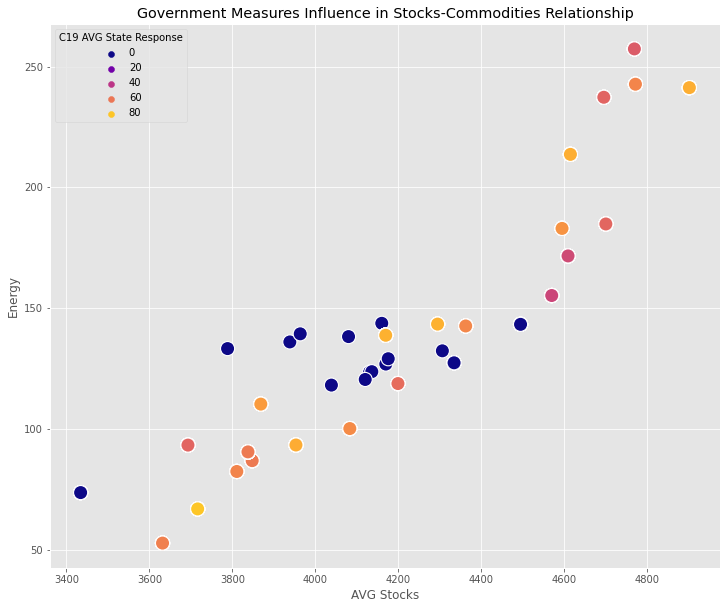

In [94]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='AVG Stocks',y='Energy',data=df_Dataset,hue='C19 AVG State Response', s=200, palette='plasma')
plt.title('Government Measures Influence in Stocks-Commodities Relationship')
plt.show()

## Paso #2: Variable Definition

We choose X over Hue as the independent variable, that is, we want to see how the Energy Index reacts in relation to the Stock Market Average.

In [95]:
# Linear correlation between the two variables

corr_test = pearsonr(x = df_Dataset['AVG Stocks'], y =  df_Dataset['Energy'])
print("Pearsons' Correlation Coeficient: ", corr_test[0])
print("P-value: ", corr_test[1])

Pearsons' Correlation Coeficient:  0.9296114664565132
P-value:  0.0


High correlation and little chance margin.

## Step #3: Model Design

  We divide the data into training set (80%) and test set (20%)

In [96]:
# División de los datos en train y test

X = df_Dataset[['AVG Stocks']]
Y = df_Dataset['Energy']

X_train, X_test, Y_train, Y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Model Creation

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = Y_train)

LinearRegression()

In [97]:
# Model Information

print("Intercept:", modelo.intercept_)
print("Coeficient:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficient de determinación R^2:", modelo.score(X, Y))

Intercept: [-414.46341605]
Coeficient: [('AVG Stocks', 0.13131786296485015)]
Coeficient de determinación R^2: 0.8641645493598419


## Step #4: Model error calculation.

The root mean square error (RMSE) or root mean square deviation (RDCM) (in English: root-mean-square deviation, RMSD, or root-mean-square error, RMSE) is a frequently used measure of the differences between the values (sample or population values) predicted by a model or estimator and the observed values. The RECM represents the square root of the second moment of the sample of the differences between the predicted values and the observed values or the root mean square of these differences. These deviations are called residuals when the calculations are performed on the data sample that was used for the estimation, and they are called errors (or prediction errors) when they are calculated out of the sample.

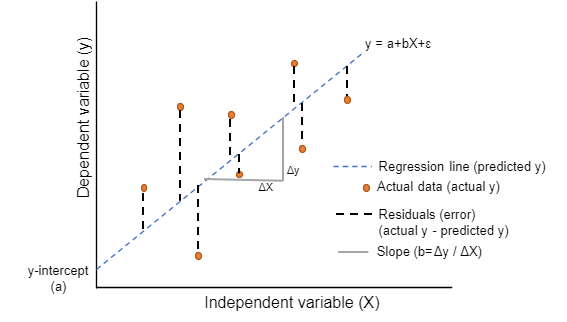

In [98]:
# Model' Error Test

predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = Y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"Test Error (rmse) is : {rmse}")

[[ 89.5109048 ]
 [104.70569472]
 [212.21431595]]

Test Error (rmse) is : 21.708750314593875


### Error (RMSE)  : 21.70

## Step #5: Matrix Model Creation

In [99]:
# A column of 1s must be added to the matrix of predictors for the intercept of the model

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 3.918e+04
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:21:08   Log-Likelihood:                -28146.
No. Observations:                6249   AIC:                         5.630e+04
Df Residuals:                    6247   BIC:                         5.631e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -414.4634      2.824   -146.779      0.0

### Observations

[No. Observations] : The model made 6249 observations, which is the size of our sample.

[Coef] The coefficiency term indicates the change for Y per unit change in X. In this case, If Y goes up 1 unit, Y goes up 0.13.

[std error] The standard deviation for the constant is 2.8, and for the coefficient term it is 0.001.

[P>t] The P value is the probability that the null hypothesis will be true, that is, that the statistical results do not follow the proposed causality. Since here they are 0.0 and the t-values are dissimilar to each other (confirming that X has a significant impact on Y), the null hypothesis is discarded.

[0.025 - 0.975] Values within these ranges are sparse.

[R-squared] It is the coefficient of determination that indicates what percentage of variation of the dependent variable is explained by the independent: In this case, it is 0.86 or 86%.


## Paso #6: Predictions

In [100]:
# Predictions with 95% confidence interval

predicciones_train = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones_train.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,121.765198,0.294564,121.187751,122.342645,78.882266,164.648131
1,175.828762,0.325861,175.189962,176.467563,132.944960,218.712565
2,188.965801,0.365291,188.249706,189.681897,146.080778,231.850825
3,191.619736,0.374182,190.886210,192.353261,148.734417,234.505054


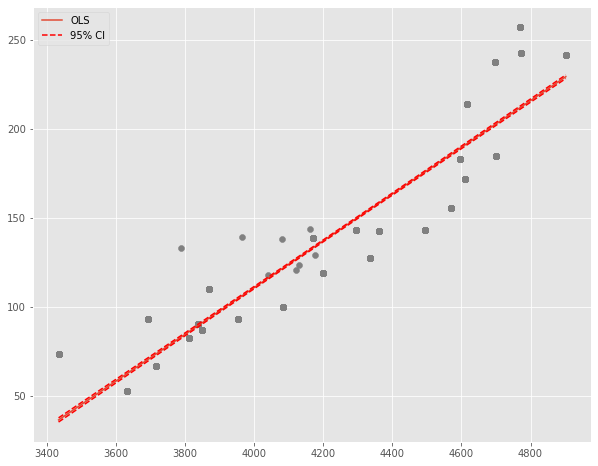

In [101]:
# Predictions with 95% confidence interval


predicciones_train['x'] = X_train[:, 1]
predicciones_train['y'] = Y_train
predicciones_train_sort = predicciones_train.sort_values('x')

# Model Plot

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(predicciones_train_sort['x'], predicciones_train_sort['y'], marker='o', color = "gray")
ax.plot(predicciones_train_sort['x'], predicciones_train_sort["mean"], linestyle='-', label="OLS")
ax.plot(predicciones_train_sort['x'], predicciones_train_sort["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones_train_sort['x'], predicciones_train_sort["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones_train_sort['x'], predicciones_train_sort["mean_ci_lower"], predicciones_train_sort["mean_ci_upper"], alpha=0.1)
ax.legend();


## Paso #7 : Waste Diagnosis

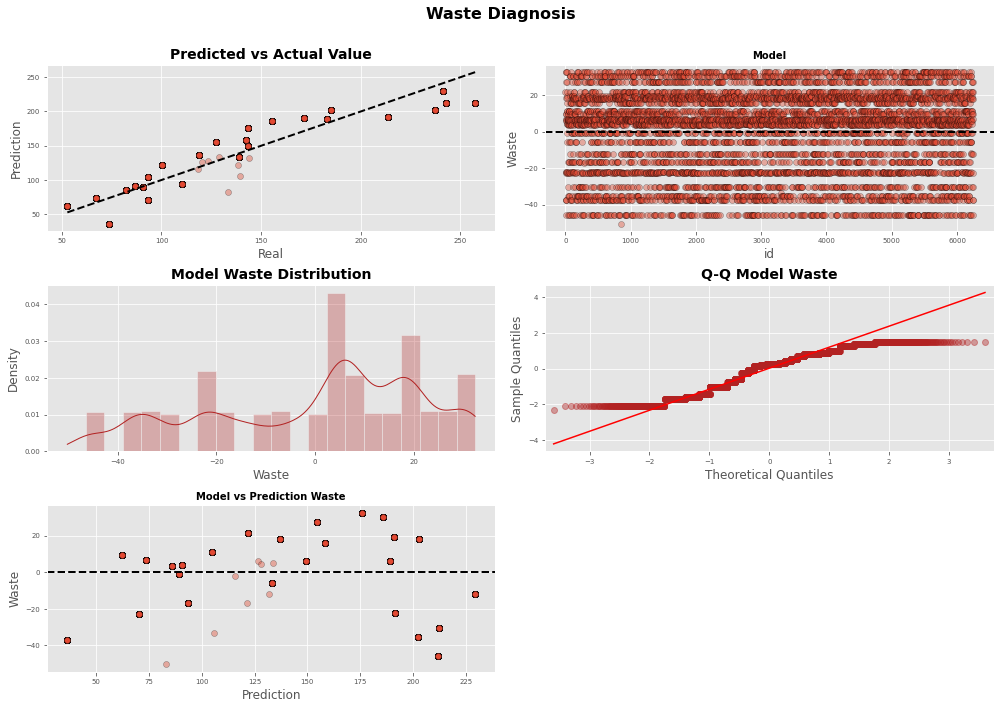

In [102]:
# Diagnostic errors (residuals) of training predictions

Y_train = Y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - Y_train

# Plots

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

axes[0, 0].scatter(Y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted vs Actual Value', fontsize = 14, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(Y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Waste')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Model Waste Distribution', fontsize = 14,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Waste")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q Model Waste', fontsize = 14, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Model vs Prediction Waste', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Waste')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Waste Diagnosis', fontsize = 16, fontweight = "bold");

## Paso #8: Accuracy

In [49]:
# We verify the success rate of the model

test_accuracy = r2_score(prediccion_train, Y_train)

# calculate the accuracy in Test

print('% Hits over Test Set:',test_accuracy*100)

% Hits over Test Set: 84.05500336378844


### Model Accuracy: 84%

## Step #9: Interpretation

The bivariate linear regression test exhibits acceptable behavior, with a % of successes of 84%, a mean error of 21.7, and an expected residual distribution. The null hypothesis is also ruled out, the values found outside the confidence intervals are scarce and the coefficient of determination is 86%; for which the dependent variable is highly explained by the independent variable. We will seek to maintain or improve these values while adding other independent variables that are of major conceptual importance within what would be the economic validity of the Index studied.

# Multivariate Linear Regression Model

To the previously analyzed variables (Energy and Stock Market Index) we will now add two more: ***Average State Response C19*** and ***Average Commodities***, in order to add validity to the results obtained with the models.

## Step #1: Reprint of Selected Variables.

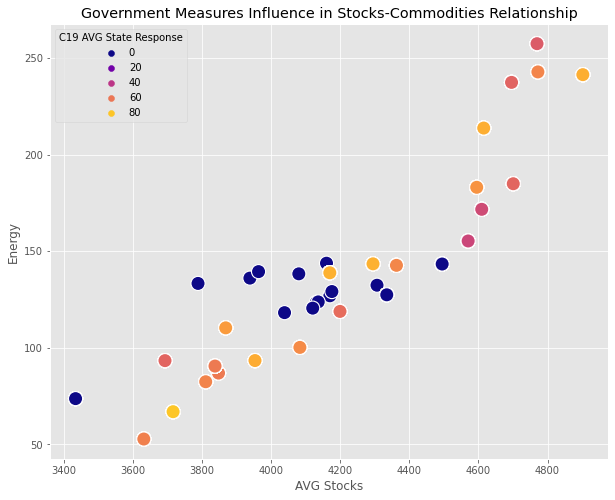

In [50]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='AVG Stocks',y='Energy',data=df_Dataset,hue='C19 AVG State Response', s=200, palette='plasma')
plt.title('Government Measures Influence in Stocks-Commodities Relationship')
plt.show()

## Step #2 : DataFrame Creation

We isolate our Features and Target.

In [51]:
df_Datos = df_Dataset[['Date','Energy', 'AVG Stocks', 'AVG Commodities', 'C19 AVG State Response']]
df_Datos.set_index(['Date'], inplace=True)

Temporal Index with Date

In [52]:
df_Datos = df_Datos.assign(Time=[0 + i for i in range(len(df_Datos))])[['Time'] + df_Datos.columns.tolist()]

In [53]:
df_Datos.head(3)

,Time,Energy,AVG Stocks,AVG Commodities,C19 AVG State Response
Date,,,,,
2019-01-01,0,133.30,3788.66,117.08,0.0
2019-02-01,1,136.05,3938.79,119.01,0.0
2019-03-01,2,138.26,4080.34,119.91,0.0


## Step #3:Correlation Matrix

In [54]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df_Datos.select_dtypes(include=['float64', 'int']).corr(method='pearson') 

tidy_corr_matrix(corr_matrix).head(5)

,variable_1,variable_2,r,abs_r
16,AVG Commodities,Energy,0.986789,0.986789
8,Energy,AVG Commodities,0.986789,0.986789
13,AVG Stocks,AVG Commodities,0.955467,0.955467
17,AVG Commodities,AVG Stocks,0.955467,0.955467
3,Time,AVG Commodities,0.942292,0.942292


## Step#4: Correlation HeatMap

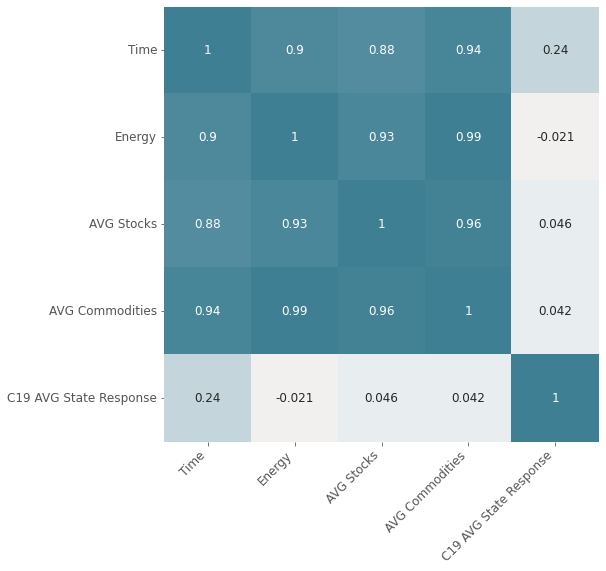

In [55]:
# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

## Step #5 : First definition of the Model

This version of the Model, which uses the Dataframe df_Datos, will allow later visualization.

In [56]:
# Train-Test dataset division


X2 = df_Datos.loc[:, ['Time','AVG Stocks', 'AVG Commodities', 'C19 AVG State Response']] 
Y2 = df_Datos.loc[:, 'Energy']

In [57]:
# Data Training

model = LinearRegression()
model.fit(X2, Y2)

LinearRegression()

## Step #6: Creation of the Model in Matrix



Creation of a new Dataframe (df_Stats), the same as the previous one, to be able to manipulate our data with arrays, manipulate the Train and Test parts and receive in-depth information from the model. The purpose is, in turn, to be able to preserve the previous dataframe in pandas format.

In [58]:
df_Stats = df_Dataset[['Date','Energy', 'AVG Stocks', 'AVG Commodities', 'C19 AVG State Response']]
df_Stats.set_index(['Date'], inplace=True)

In [59]:
df_Stats = df_Stats.assign(Time=[0 + i for i in range(len(df_Datos))])[['Time'] + df_Stats.columns.tolist()]

In [60]:
# We copy Our Variables to produce an Array that allows us to obtain more data,
# without transforming our variables into numpy Arrays.

MX2 = df_Stats[['Time','AVG Stocks', 'AVG Commodities', 'C19 AVG State Response']] 
MY2 = df_Stats['Energy']

MX2_train, MX2_test, MY2_train, MY2_test = train_test_split(
                                        MX2,
                                        MY2.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [61]:
# A column of 1s must be added to the matrix of predictors for the intercept of the model

MX2_train = sm.add_constant(MX2_train, prepend=True)
modelo = sm.OLS(endog= MY2_train, exog= MX2_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 9.334e+04
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:09:13   Log-Likelihood:                -21511.
No. Observations:                6249   AIC:                         4.303e+04
Df Residuals:                    6244   BIC:                         4.307e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -53

### Observations

[No. Observations] : The model made 6249 observations, which is the size of our sample.


[std error] The standard deviation for the constant is 2, and for the variables, values close to zero 0.

[P>t] The P value is the probability that the null hypothesis will be true, that is, that the statistical results do not follow the proposed causality. Since here they are 0.0 and the t-values are dissimilar to each other (confirming that X has a significant impact on Y), the null hypothesis is discarded.

[0.025 - 0.975] Values within these ranges are sparse.

[R-squared] It is the coefficient of determination that indicates what percentage of variation of the dependent variable is explained by the independent: In this case, it is 0.98 or 98%.

## Step #7: Improvements over the Previous Model

With the new variables added, the model has improved substantially:

  - High R2 (0.98), is capable of explaining 98% of the variability observed in the price of the Energy Index, an improvement of 14 points, starting from the 84% registered in the bivariate test.
  - Mean Error (RMSE) of 7.56, one third of that recorded in the test (21.7).
  - Mean Absolute Error (MAE) of 6.34.

## Step #8 : Definition of Predictive Function.

In [62]:
# We make the prediction keeping the index of the variable

y_predict = pd.Series(model.predict(X2), index=X2.index)

## Step #9 : Accuracy

In [63]:
# We verify the success rate of the model

test_accuracy = r2_score(y_predict, Y2)

#Calculate the accuracy in Test

print('% Hits over Test Set:',test_accuracy*100)

% Hits over Test Set: 98.34282391835575


### Model Accuracy: 98%.

### Accuracy Visualization

In [64]:
# We create a dataframe with the current value and the predicted value

df_predict = pd.DataFrame({'Actual': df_Datos.Energy, 'Predict': y_predict})
df_predict.head(5)

,Actual,Predict
Date,,
2019-01-01,133.30,133.416971
2019-02-01,136.05,133.958625
2019-03-01,138.26,132.158411
2019-04-01,143.77,138.674383
2019-05-01,139.41,136.914732


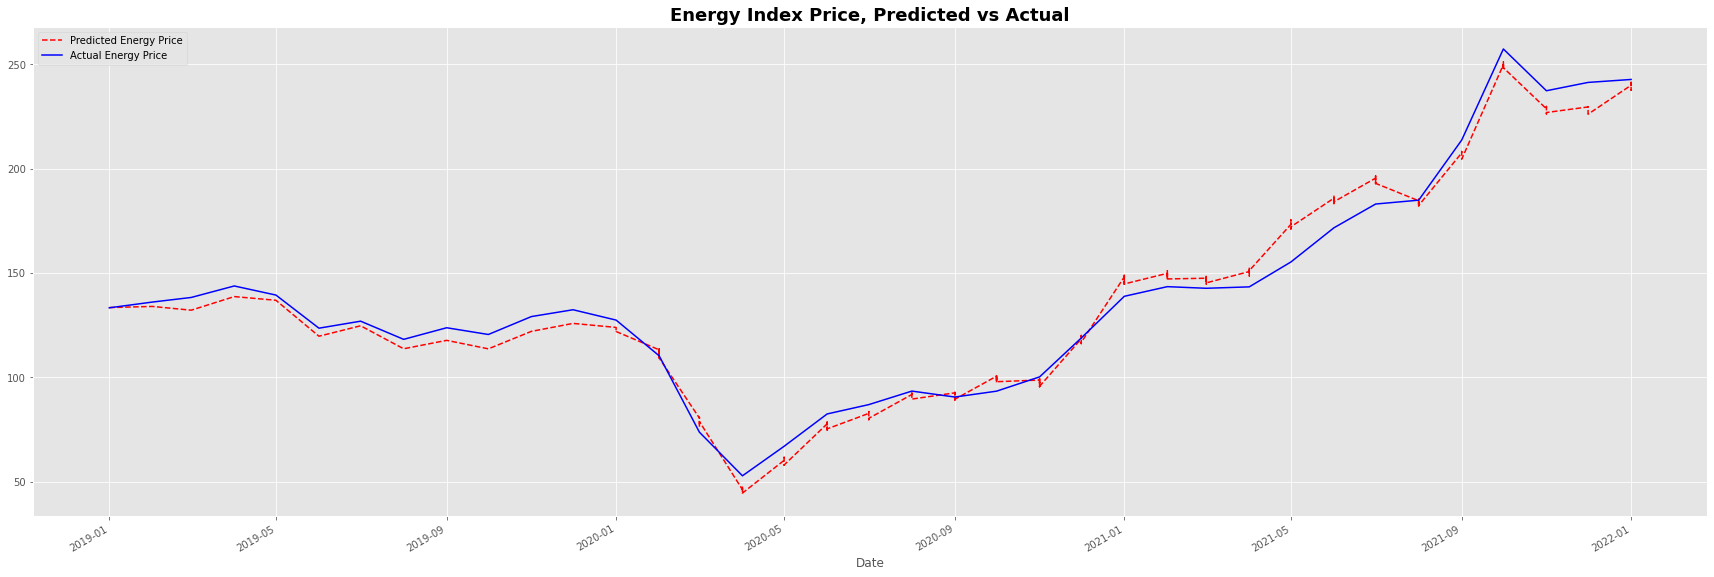

In [66]:
# We plot the current value and the predicted value

plt.figure(figsize=(30,10))

df_predict.Predict.plot(color='r', ls='--', label='Predicted Energy Price')
df_predict.Actual.plot(color='b', ls='-', label='Actual Energy Price')

plt.title('Energy Index Price, Predicted vs Actual', fontsize=18, fontweight='bold')
plt.legend(loc='upper left')
plt.show()

## Step #10: Error and Residuals

The root mean square error (RMSE) or root mean square deviation (RDCM) (in English: root-mean-square deviation, RMSD, or root-mean-square error, RMSE) is a frequently used measure of the differences between the values (sample or population values) predicted by a model or estimator and the observed values. The RECM represents the square root of the second moment of the sample of the differences between the predicted values and the observed values or the root mean square of these differences. These deviations are called residuals when the calculations are performed on the data sample that was used for the estimation, and they are called errors (or prediction errors) when they are calculated out of the sample.

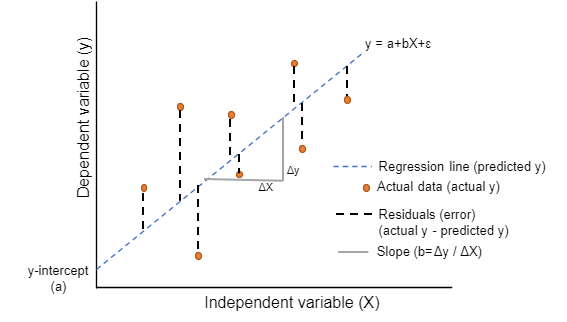

In [67]:
# We check the mean of the error

RMSE = np.sqrt(mean_squared_error(Y2, y_predict))
print("Test Set's Mean Error is : ", RMSE)

Test Set's Mean Error is :  7.565086931155757


### Mean Eror (RMSE): 7.56

In [68]:
# We check the mean of the absolute error

MAE = mean_absolute_error(Y2, y_predict)
print("Test Set's Mean Absolut Error is : ", MAE)

Test Set's Mean Absolut Error is :  6.330832521208693


### Absolut Error Mean (MAE): 6.34

### Error and Waste Visual Diagnostic

In [69]:
# Diagnostic errors (residuals) of training predictions

MY2_train = MY2_train.flatten()
prediccion_train = modelo.predict(exog = MX2_train)
residuos_train   = prediccion_train - MY2_train

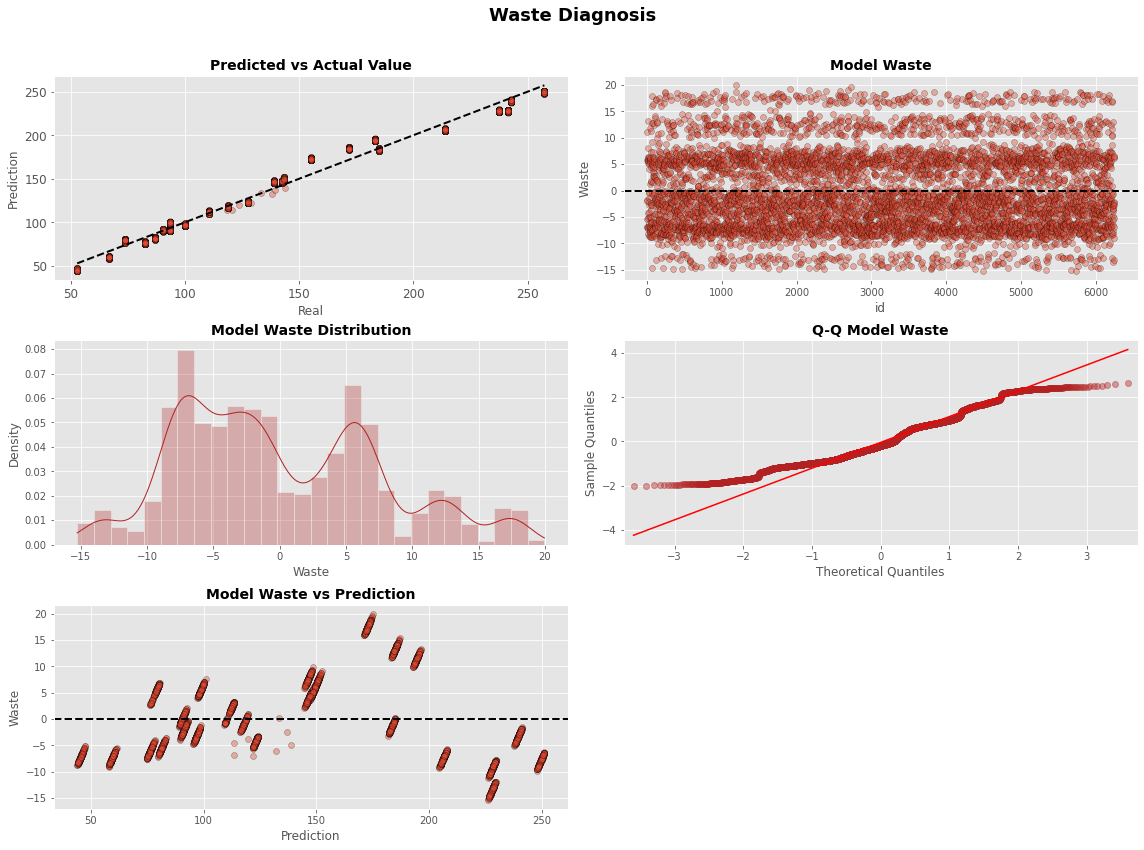

In [71]:
# Plots

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

axes[0, 0].scatter(MY2_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([MY2_train.min(), MY2_train.max()], [MY2_train.min(), MY2_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted vs Actual Value', fontsize = 14, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 12)

axes[0, 1].scatter(list(range(len(MY2_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model Waste', fontsize = 14, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Waste')
axes[0, 1].tick_params(labelsize = 10)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Model Waste Distribution', fontsize = 14,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Waste")
axes[1, 0].tick_params(labelsize = 10)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q Model Waste', fontsize = 14, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 10)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Model Waste vs Prediction', fontsize = 14, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Waste')
axes[2, 0].tick_params(labelsize = 10)

# Removal of empty axes

fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Waste Diagnosis', fontsize = 18, fontweight = "bold");

### Observations

The residuals do not appear to be randomly distributed around zero, without maintaining approximately the same variability along the X-axis. This pattern points to a lack of homoscedasticity and a normal distribution.

## Step #11: Normality Test

It is checked whether the residuals follow a normal distribution using two statistical tests: Shapiro-Wilk test and D'Agostino's K-squared test. The latter is the one that includes the summary of statsmodels under the name of Omnibus.

In both tests, the null hypothesis considers that the data follows a normal distribution, therefore, if the p-value is not lower than the selected alpha reference level, there is no evidence to rule out that the data is normally distributed.

In [73]:
# Residual normality Shapiro-Wilk test

shapiro_test = stats.shapiro(residuos_train)
shapiro_test

(0.9652750492095947, 2.6589308775164595e-36)

P- Value : 2.6

In [74]:
# Normality of residuals D'Agostino's K-squared test

k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 311.2480467789808, p-value = 2.5902721155323094e-68


P-Value: 2.59

## Step #12: Model Optimization

Next, optimization techniques of the model are displayed. These take place at various levels. At the dataframe level, it operates with a shifting. At the parameter level, with GridSearchCV, and at the hyperparameter level, with RandomSearch.


## Shifting

Pandas dataframe.shift() shifts the index by the desired number of periods with an optional time frequency. This function takes a scalar parameter called period, which represents the number of movements to be made on the desired axis. This function is very useful when dealing with time series data.

In [75]:
# 3-shift of values

df_Datos['close_Energy_shift'] = df_Datos['Energy'].shift(3)
df_Datos

,Time,Energy,AVG Stocks,AVG Commodities,C19 AVG State Response,close_Energy_shift
Date,,,,,,
2019-01-01,0,133.30,3788.66,117.08,0.00,NaN
2019-02-01,1,136.05,3938.79,119.01,0.00,NaN
2019-03-01,2,138.26,4080.34,119.91,0.00,NaN
2019-04-01,3,143.77,4160.48,123.42,0.00,133.30
2019-05-01,4,139.41,3963.84,120.48,0.00,136.05
...,...,...,...,...,...,...
2022-01-01,7807,242.76,4772.22,190.90,63.02,242.76
2022-01-01,7808,242.76,4772.22,190.90,79.43,242.76
2022-01-01,7809,242.76,4772.22,190.90,50.52,242.76


In [76]:
# We prepare the data, train it and make the prediction.
# we fill the NaN values with an average value of 130 since it is a consistent value for the first few days of values in the dataset.


X3 = df_Datos.loc[:, ['close_Energy_shift']]
X3.fillna(130,inplace=True)  
y3 = df_Datos.loc[:, 'Energy']  
y3, X3 = y3.align(X3, join='inner') 

model = LinearRegression()
model.fit(X3, y3)

y_pred3 = pd.Series(model.predict(X3), index=X3.index)

In [77]:
# Verify the mean of the error

rmse = np.sqrt(mean_squared_error(y3, y_pred3))
rmse

1.7084108454256708

### Updated Error RMSE: 1.7

In [78]:
# Verify Absolute mean of error

mae = mean_absolute_error(y3, y_pred3)
mae

0.17827191095107872

### Updated Error MAE : 1.78

In [79]:
# Accuracy % Check

test_accuracy =r2_score(y_pred3, df_Datos.Energy)

print('% Hits over Test Set:',test_accuracy*100)

% Hits over Test Set: 99.91679515563095


### Updated Accuracy: 99.9%

In [80]:
# We create a dataset with the current value and the predicted value

data_df2 = pd.DataFrame({'Actual2': df_Datos.Energy, 'Predict2': y_pred3})
data_df2

,Actual2,Predict2
Date,,
2019-01-01,133.30,130.041724
2019-02-01,136.05,130.041724
2019-03-01,138.26,130.041724
2019-04-01,143.77,133.342157
2019-05-01,139.41,136.092518
...,...,...
2022-01-01,242.76,242.816518
2022-01-01,242.76,242.816518
2022-01-01,242.76,242.816518


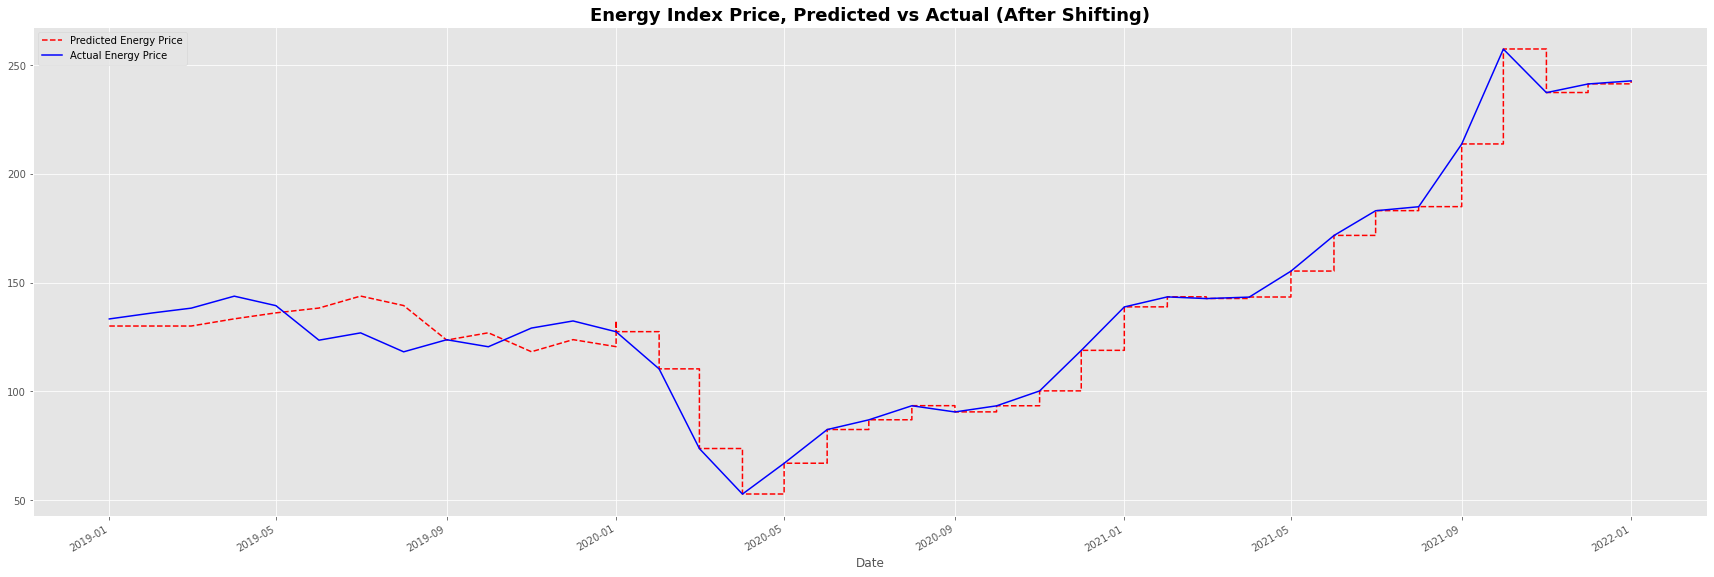

In [81]:
# We plot the current value and the predicted value

plt.figure(figsize=(30,10))

data_df2.Predict2.plot(color='r', ls='--', label='Predicted Energy Price')
data_df2.Actual2.plot(color='b', ls='-', label='Actual Energy Price')
plt.title('Energy Index Price, Predicted vs Actual (After Shifting)', fontsize=18, fontweight='bold')
plt.legend(loc='upper left')
plt.show()

## GridSearchCV

GridSearchCV is a technique to search for the best parameter values from the given set of parameter grids. It is basically a cross validation method. the model and parameters are required to be entered. The best values of the parameters are extracted and then the predictions are made.


In [82]:
model_params = {
        'random_forest': {
        'model':RandomForestRegressor(max_features="sqrt",
                                      bootstrap=True,
                                      max_samples=2/3,
                                      oob_score=True),
    'params':{
        'n_estimators':[100,125,150],
        'criterion':['squared_error', 'absolute_error', 'poisson']
         }
   },
   'knn':{
       'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':np.arange(3,8,1)
        }
        }
   }

In [83]:

scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(MX2_train,MY2_train)
  scores.append({
      'model' : model_name,
      'best_score': clf.best_score_,
      'best_parans': clf.best_params_
  })

In [84]:
df_scores = pd.DataFrame(scores, columns = ['model','best_score', 'best_params'])
df_scores

,model,best_score,best_params
0,random_forest,0.999912,NaN
1,knn,0.999952,NaN


Observation:

Both in Random Forest Regressor and K-Nearest Neighbors they show a score of 99%

## RandomSearch

RandomSearch or "random search" is a technique in which random combinations of hyperparameters are used to find the best solution for the built model. It is similar to grid search, and yet has been shown to produce comparatively better results.

In [85]:
# Datos

# Features

x1 = df_Dataset[['AVG Stocks']]
x2 = df_Dataset['C19 AVG State Response']
x3 = df_Dataset['AVG Commodities']

# Target 

y1 = df_Dataset['Energy']

df_search = df_Dataset[['AVG Stocks', 'AVG Commodities', 'C19 AVG State Response']]

In [86]:
rf = RandomForestRegressor(random_state = 35)

In [87]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [88]:
rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [89]:
# Random Search Bivariado

rf_random.fit(x1, y1)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 19, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}  



In [90]:
# Random Search Multivariado

rf_random.fit(df_search, y1)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 4, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}  



### Observaciones

Results of the Multivariate Random Search. Best Parameters::

- 'n_estimators': 4
- 'min_samples_split': 10
- 'min_samples_leaf': 1,
- 'max_features': 'sqrt'
- 'max_depth': 100
- 'bootstrap': False

We proceed to run the search with these parameters.

In [91]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 8, num = 8)] # number of trees in the random forest
max_features = ['sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(90, 110, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [10] # minimum sample number to split a node
min_samples_leaf = [1] # minimum sample number that can be stored in a leaf node
bootstrap = [False] # method used to sample data points

random_grid1 = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [92]:
rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid1,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [93]:
# Random Search Multivariado

rf_random.fit(df_search, y1)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid1, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8], 'max_features': ['sqrt'], 'max_depth': [90, 91, 93, 95, 97, 99, 100, 102, 104, 106, 108, 110], 'min_samples_split': [10], 'min_samples_leaf': [1], 'bootstrap': [False]} 

Best Parameters:  {'n_estimators': 4, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}  



# Conclusions



The Linear Regression test model allows us to observe a high association between the independent variable of average stock market indices and the dependent variable of the price of the energy index. There is a Pearson Correlation Coefficient of 0.9. It is a high correlation and a significant p-value significance level because it is less than 0.05. This allows us to have a good model since R2 is 0.86. This means that 86% of the model is the proportion of the variation in the stock market index that is explained by its linear relationship with the price of the energy variable. Level of conceptual validity, the test takes place, since, within the macroeconomic theory, the grouped indices of commodities and the stock market usually show more or less interdependent behaviors.
The Multivariable Regression Model represents an improvement when it comes to being able to predict the future value of energy, since the R2 increases to 0.98. This was achieved thanks to the addition of the independent variables “Average Commodities” and “Average State Response C19”. Not only is it possible to reduce the error percentage and increase the accuracy of the model, but conceptually it represents involving two variables of macroeconomic weight, increasing validity.
After producing the optimization tests, it is obtained that the model has the potential to increase the accuracy to 99.9% in its prediction of the Energy value, as long as the indicated parameters and hyperparameters are modified.
The work then represents a descriptive analysis, both statistical and visual, of all the most relevant economic indices, during two years of the C19 pandemic. Predictive analysis is also introduced, where a machine learning model capable of accurately predicting the price of the energy index is developed. The model, with the optimizations applied, and assembled in an application with its pertinent data-pipeline, where the ingestion of information from the correct databases is provided, is capable of providing convincing value to those who wish to take advantage of it.
In this way, the report is delivered to the United Nations, not only so that they have a reliable method of economic analysis of data, but also to expand the exploration of the prediction of the energy index and many others, thus providing information refined for strategic decision making.
